<a href="https://colab.research.google.com/github/JulioCesarMS/DataScience_with_Python/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Componentes principales**

Un problema central en el análisis de componentes principales es la reducción de dimensionalidad.  Hablamos de reducción de dimensionalidad si es posible describir $p$ variables por  $r$ variables tal que $r<p$, ello a costa de una pequeña pérdida de información. 

El objetivo de componentes principales es precisamente ello, dadas n observaciones de p variables (atributos), se analiza si es posible representar dicha información con un número menor de variables.

La técnica de componentes principales es debida a Hotelling($1933$), pero los origenes pueden encontarse en ajuste ortogonales por mínimos cuadrados por Karl Pearson.

En general, la técnica de PCA (principal components analysis) tiene dos principales utilidades:


- Permite representar observaciones de un espacio p-dimensional en uno de menor dimensión, permitiendo también, saber que variables afectan más la variabilidad de los datos.

-  Cuando existen variables altamente correlacionadas, el PCA permite transformar dichas variables en nuevas variables no correlacionadas.



In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig
from sklearn.decomposition import PCA
sns.set()

In [ ]:
x1 = np.linspace(0,20, 50)
x2 = x1 + np.random.normal(0,3, len(x1))

X = pd.DataFrame({'x1':x1, 'x2':x2})

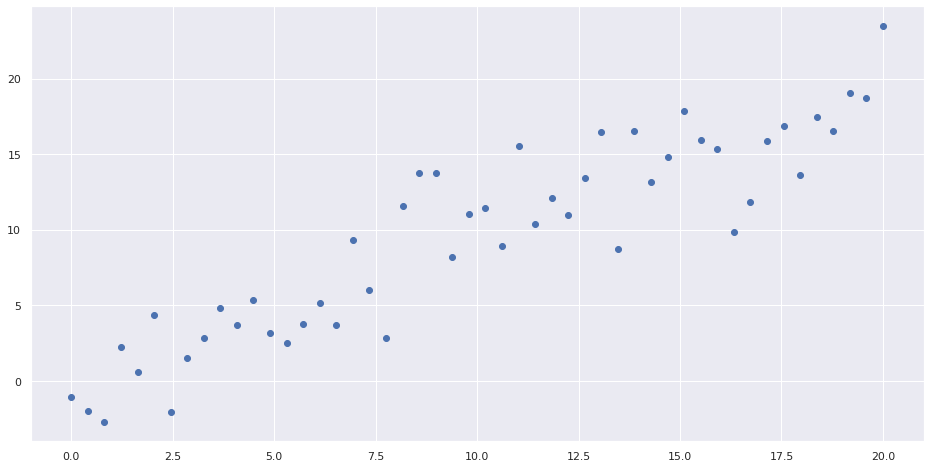

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(x1, x2, 'o')
plt.show()

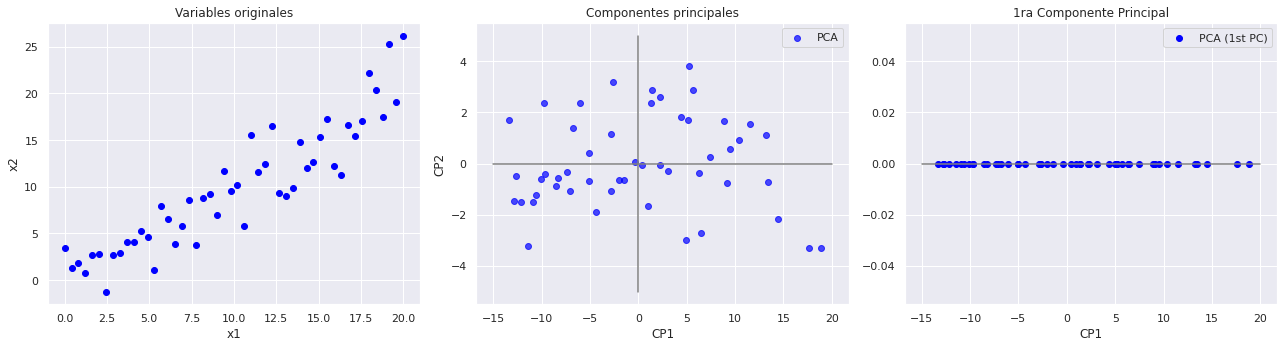

In [ ]:
pca = PCA()
X_red = pca.fit_transform(X)

fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].scatter(X['x1'],X['x2'],color='blue')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('x2')
axs[0].set_title('Variables originales')
# --- We draw the axis, for reference:
axs[1].scatter(X_red[:,0],X_red[:,1],alpha=0.7,color='blue',label="PCA")
axs[1].set_xlabel('CP1')
axs[1].set_ylabel('CP2')
axs[1].set_title('Componentes principales')
axs[1].plot([-15,20],[0,0],color='gray')
axs[1].plot([0,0],[-5,5],color='gray')
axs[1].legend(loc='best')
axs[2].scatter(X_red[:,0],[0 for x in X_red],color='blue',label="PCA (1st PC)")
axs[2].plot([-15,20],[0,0],color='gray')
axs[2].set_xlabel('CP1')
axs[2].set_title('1ra Componente Principal')
axs[2].legend(loc='best')
fig.tight_layout()
fig.show()

Supongamos que tenemos una matriz **X** de datos 

$$\textbf{X}=
\left(
\begin{array}{cccc}
X_{1,1} & X_{1,2} & ... & X_{1,p}\\
X_{2,1} & X_{2,2} & ... & X_{2,p}\\
\vdots  & \vdots  & \vdots & \vdots\\
X_{n,1} & X_{n,2} & ... & X_{n,p}\\
\end{array}\right)$$

En donde cada rengl\'on reprensenta a cada individuo, es decir, $X_{i,1},...,X_{i,p}$. Con una matriz de varianzas y covarianzas de

$$Var(\textbf{X})=\Sigma = 
\left(
\begin{array}{cccc}
\sigma_1^2    & \sigma_{12}   & ...  & \sigma_{1p}\\
\sigma_{21}^2 & \sigma_{2}^2  & ...  & \sigma_{2p}\\
\vdots        &  \vdots       & ...  & \vdots \\
\sigma_{n1}   & \sigma_{2n}   & ...  & \sigma_{n}^2
\end{array}\right)$$

Consideremos la siguientes combinaciones lineales

$$\begin{array}{cccccc}
Y_1  & = & e_{11} X_1 + & e_{12} X_2 + & ... + & e_{1p} X_p\\
Y_2  & = & e_{21} X_1 + & e_{22} X_2 + & ... + & e_{2p} X_p\\
 & \vdots &            &              &          & \\
 Y_{n}  & = & e_{p1} X_1 + & e_{p2} X_2 + & ... + & e_{pp} X_p
\end{array}$$

Con varianza poblacional 
\begin{equation}
Var(Y_i) = \textbf{e}^{'} \Sigma  \textbf{e}
\end{equation}


El problema que se tiene es máximizar
\begin{eqnarray*}
Var(Y_i) & = &  \textbf{e}^{'} \Sigma  \textbf{e}\\
\end{eqnarray*}

La solución puede obtenerse mediante el método de multiplicadores de Lagrange.
El procedimiento consite en lo siguiente:


- Se introduce la restricción mediante el multiplicador de Lagrange:
\begin{equation*}
L  =  \textbf{e}^{'} S \textbf{e} - \lambda(\textbf{e}^{'} \textbf{e} - 1 )
\end{equation*}
- Se maximiza la expresión derivando parcialmente los componentes e igualando a cero.
\begin{eqnarray*}
\frac{\partial L} {\partial \textbf{e}_i} & = & 2S \textbf{e}  -2\lambda \textbf{e}\\
0 & = & (S  - \lambda )\textbf{e}
\end{eqnarray*}

De forma similar el valor de lambda puede obtenerse mediante el cálculo de los eigenvalores 
\begin{eqnarray*}
(S - \lambda I)\textbf{e} & = & \textbf{0}
\end{eqnarray*}


## **Ejemplo:**

Supongamos que se tiene los datos de $15$ estudiantes con sus respectivas calificaciones en cada asignatura($8$ asignaturas). Supongamos que se desea analizar todas las variables en una escala de dimensi\'on menor, para mayor referencia *Daniel Peña (2002)*.


| Alumno | Lengua | Matemáticas | Física | Inglés | Filosofía | Historia | Química | Educ. Física |
| -- | -- | -- | -- | -- | -- | -- | -- | -- |
1  |   5 |   5 |   5 |   5 |   5 |   5 |   5 |  5 |
2  |   7 |   4 |   3 |   8 |   4 |   7 |   3 |   8 | 
3  |   5 |   8 |   7 |   6 |   5 |   6 |   7 |   5 | 
4  |   7 |   2 |   4 |   8 |   7 |   7 |   3 |   6 | 
5  |   8 |   9 |  10 |   8 |   8 |   7 |   9 |   4 |
6  |   4 |   9 |   8 |   4 |   3 |   4 |   7 |   5 | 
7  |   6 |   4 |   4 |   6 |   5 |   5 |   3 |   7 | 
8  |   4 |   7 |   8 |   3 |   3 |   2 |   8 |   3 | 
9  |   5 |   5 |   4 |   5 |   6 |   5 |   5 |   1 |
10  |   7 |   4 |   5 |   7 |   8 |   8 |   4 |   6 |
11  |   7 |   8 |   8 |   7 |   7 |   6 |   7 |   9 | 
12  |   4 |   3 |   3 |   4 |   3 |   2 |   1 |   4 | 
13  |   7 |   4 |   4 |   7 |   8 |   7 |   4 |   5 | 
14  |   3 |   5 |   5 |   2 |   3 |   3 |   5 |   7 | 
15  |   5 |   6 |   6 |   5 |   5 |   5 |   6 |   6 | 


In [ ]:
  lengua = [5, 7, 5, 7, 8, 4, 6, 4, 5, 7, 7, 4, 7, 3, 5]
  matematicas = [5, 4, 8, 2, 9, 9, 4, 7, 5, 4, 8, 3, 4, 5, 6]
  fisica = [5, 3, 7, 4, 10, 8, 4, 8, 4, 5, 8, 3, 4, 5, 6]
  ingles = [5, 8, 6, 8, 8, 4, 6, 3, 5, 7, 7, 4, 7, 2, 5]
  filosofia = [5, 4, 5, 7, 8, 3, 5, 3, 6, 8, 7, 3, 8, 3, 5]
  historia = [5, 7, 6, 7, 7, 4, 5, 2, 5, 8, 6, 2, 7, 3, 5]
  quimica = [5, 3, 7, 3, 9, 7, 3, 8, 5, 4, 7, 1, 4, 5, 6]
  efisica = [5, 8, 5, 6, 4, 5, 7, 3, 1, 6, 9, 4, 5, 7, 6]

  alumnos = pd.DataFrame({'lengua':lengua, 'matematicas':matematicas, 'fisica':fisica, 'ingles':ingles, 'filosofia':filosofia, 'historia':historia, 'quimica':quimica, 'efisica':efisica})
  alumnos

,lengua,matematicas,fisica,ingles,filosofia,historia,quimica,efisica
0,5,5,5,5,5,5,5,5
1,7,4,3,8,4,7,3,8
2,5,8,7,6,5,6,7,5
3,7,2,4,8,7,7,3,6
4,8,9,10,8,8,7,9,4
5,4,9,8,4,3,4,7,5
6,6,4,4,6,5,5,3,7
7,4,7,8,3,3,2,8,3
8,5,5,4,5,6,5,5,1
9,7,4,5,7,8,8,4,6


In [ ]:
alumnos_center = alumnos - alumnos.mean(axis=0)
alumnos_center

,lengua,matematicas,fisica,ingles,filosofia,historia,quimica,efisica
0,-0.6,-0.533333,-0.6,-0.666667,-0.333333,-0.266667,-0.133333,-0.4
1,1.4,-1.533333,-2.6,2.333333,-1.333333,1.733333,-2.133333,2.6
2,-0.6,2.466667,1.4,0.333333,-0.333333,0.733333,1.866667,-0.4
3,1.4,-3.533333,-1.6,2.333333,1.666667,1.733333,-2.133333,0.6
4,2.4,3.466667,4.4,2.333333,2.666667,1.733333,3.866667,-1.4
5,-1.6,3.466667,2.4,-1.666667,-2.333333,-1.266667,1.866667,-0.4
6,0.4,-1.533333,-1.6,0.333333,-0.333333,-0.266667,-2.133333,1.6
7,-1.6,1.466667,2.4,-2.666667,-2.333333,-3.266667,2.866667,-2.4
8,-0.6,-0.533333,-1.6,-0.666667,0.666667,-0.266667,-0.133333,-4.4
9,1.4,-1.533333,-0.6,1.333333,2.666667,2.733333,-1.133333,0.6


In [ ]:
mat_cov = np.cov(alumnos_center.T)
print(pd.DataFrame(mat_cov))

          0         1         2         3         4         5         6  \
0  2.257143 -0.271429  0.185714  2.714286  2.428571  2.471429 -0.014286   
1 -0.271429  4.838095  4.300000 -0.523810 -0.261905 -0.366667  4.423810   
2  0.185714  4.300000  4.542857 -0.142857  0.428571 -0.100000  4.414286   
3  2.714286 -0.523810 -0.142857  3.523810  2.761905  3.166667 -0.380952   
4  2.428571 -0.261905  0.428571  2.761905  3.666667  2.976190  0.380952   
5  2.471429 -0.366667 -0.100000  3.166667  2.976190  3.495238 -0.038095   
6 -0.014286  4.423810  4.414286 -0.380952  0.380952 -0.038095  4.838095   
7  0.885714 -0.371429 -0.328571  1.142857  0.214286  1.171429 -0.771429   

          7  
0  0.885714  
1 -0.371429  
2 -0.328571  
3  1.142857  
4  0.214286  
5  1.171429  
6 -0.771429  
7  3.971429  


In [ ]:
# eigenvalues
values, vectors = eig(mat_cov)


In [ ]:
values

array([13.74809013, 11.82720931,  3.77290536,  0.79666945,  0.53112604,
        0.04103244,  0.12790717,  0.28839343])

## **Ordenar valores propios y vecores propios**

Ordenamos de forma descendente los valores propios, y con base en ello también lo hacemos para los vectores propios.

In [ ]:
# ordena valores propios de forma descendente y retorna el índice
sorted_index = np.argsort(values)[::-1]
# ordenamos los valores propios con respecto al índice
sorted_values = values[sorted_index]
# ordenamos los vectores propios con respecto al índice
sorted_vectors = vectors[:, sorted_index]

In [ ]:
values

array([13.74809013, 11.82720931,  3.77290536,  0.79666945,  0.53112604,
        0.04103244,  0.12790717,  0.28839343])

In [ ]:
# eigenvectores
pd.DataFrame(vectors)

,0,1,2,3,4,5,6,7
0,-0.105372,0.407114,0.033150,-0.154052,0.392151,0.715509,0.350742,-0.097820
1,0.562462,0.119003,-0.132830,-0.347205,-0.229989,0.064481,0.200264,0.658878
2,0.533640,0.189125,-0.065151,0.133665,0.471894,0.053972,-0.652837,-0.074542
3,-0.168784,0.490005,0.019679,-0.546592,0.259381,-0.595919,0.038771,-0.091409
4,-0.088214,0.487020,0.305344,0.665496,0.046668,-0.205036,0.146867,0.391308
5,-0.145627,0.497153,0.025606,-0.097286,-0.668762,0.240434,-0.445825,-0.133043
6,0.559317,0.171843,0.041066,0.164921,-0.232174,-0.146850,0.426281,-0.609560
7,-0.132095,0.174193,-0.938642,0.244006,0.005860,-0.066660,0.084438,0.003559


## **Número de componentes a retener**


- Retener suficientes componentes para garantizar un porcentaje predefinido de la varianza total, por ejemplo el $80\%$.
- Retener aquellas componentes cuyos autovalores superen el promedio de todos los autovalores,
$\sum_{i=1}^{p} \lambda_i/p$. Para la matriz de correlación este promedio es $1.0$.
- Utilizar una representación ggráfica de $\lambda_i$ frente a $i$, y determinar el punto en el que se produce la transición entre los autovalores grandes y los pequeños.
- Utilizar tests de significancia.\\
Para probar $H_{0k}$ se calcula el promedio de los últimos $k$ autovalores
\begin{eqnarray*}
\bar{\lambda} = \sum_{i=p-k+1}^{p} \frac{\lambda_i}{k}
\end{eqnarray*}
y se calcula el estadístico
\begin{eqnarray*}
u = \left(n - \frac{2p+11}{6} \right)\left(k \ ln(\bar{\lambda}) - \sum_{i=p-k+1}^{p} ln(\lambda_i) \right)
\end{eqnarray*}
que sigue aproximadamente una distribución $\chi_v^2$. Por lo que se rechaza $H_0$ si $u \leq \chi_v^2$


Para el ejemplo de las calificaciones, considerando los siguientes datos, sobre la proporción de la varianza explicada por las componentes, se considerá $2$ componentes como apropiado, ya que representan el $82\%$ de la variabilidad. Para mayor descripción sobre el método puede consultarse *Rencher (2003)*.

In [ ]:
# desviación estándar
sd = np.sqrt(sorted_values)
# proporción de la varianza explicada
prop_var = sorted_values/np.sum(sorted_values)
# proporción de la varianza explicada acumulada
cum_prop = np.cumsum(prop_var)
# index
cp = ['CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CP7', 'CP8']
# data frame
tab_summary = pd.DataFrame({'CP':cp, 'sd':sd, 'prop_var':prop_var, 'cum_prop':cum_prop})
tab_summary = tab_summary.set_index('CP')
tab_summary

,sd,prop_var,cum_prop
CP,,,
CP1,3.707842,0.441587,0.441587
CP2,3.439071,0.379889,0.821476
CP3,1.942397,0.121185,0.942662
CP4,0.892563,0.025589,0.968251
CP5,0.728784,0.017060,0.985311
CP6,0.537023,0.009263,0.994574
CP7,0.357641,0.004108,0.998682
CP8,0.202565,0.001318,1.000000


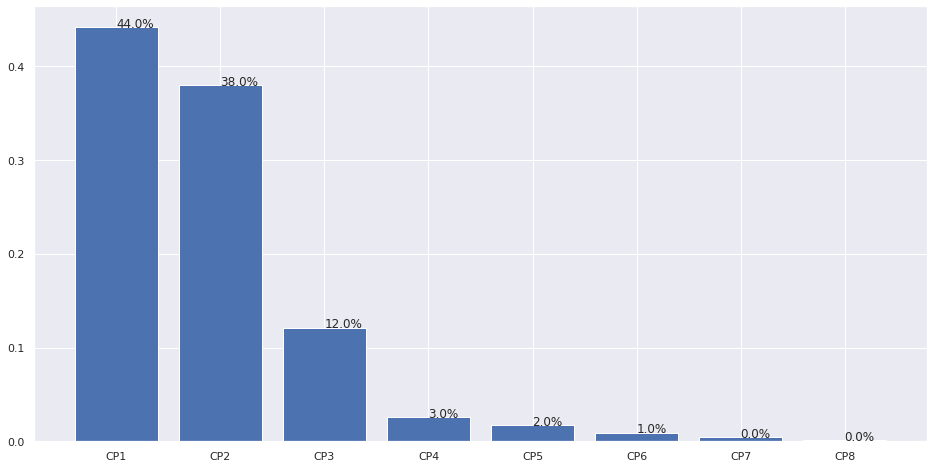

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(tab_summary.index, tab_summary['prop_var'])
for i in range(len(prop_var)):
  plt.text(i,prop_var[i], str(np.round(prop_var[i],2)*100) + '%')

Las componentes resultantes son:

\begin{eqnarray*}
Y_1  & = & -0.1053 X_1 + 0.5624 X_2 + 0.5336 X_3  -0.1687 X_4 -0.0882X_5 -0.1456X_6 + 0.5593X_7 - 0.1320X_8\\
\\
Y_2  & = & 0.4071 X_1 + 0.1190 X_2 + 0.1891 X_3  + 0.4900 X_4 + 0.4870 X_5 + 0.4971 X_6 + 0.1718X_7 + 0.1781X_8\\
\\
    & ... &\\
\\
Y_8  & = & 0.7155 X_1 + 0.0644 X_2 + 0.0539 X_3  + 0.5959 X_4 - 0.2050 X_5 + 0.2404 X_6 - 0.1468 X_7 -0.0666 X_8\\
\\
\end{eqnarray*}

donde: $X_1$ = Lengua, $X_2$ = Matemáticas, $X_3$ = Física, $X_4$ = Inglés, $X_5$ = Filosofía, $X_6$ = Historia, $X_7$ = Química, $X_8$ = Educación física\\

In [ ]:
# número de componentes a retener
k = 8

vectors_subset = sorted_vectors[:,0:k]
cp_subset = cp[0:k]

In [ ]:
Y_components = np.dot(vectors_subset.T , alumnos_center.T ).T

In [ ]:
CPs = pd.DataFrame(Y_components, columns=cp_subset)
CPs

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8
0,-0.397917,-1.135386,0.338296,0.246322,-0.377293,-0.202152,0.027921,-0.048325
1,-4.462713,1.337783,-2.425423,-2.079573,-0.430913,-0.609411,0.313362,0.202133
2,3.160973,0.930718,-0.063081,-0.842002,-0.997203,0.181827,-0.231453,-0.396125
3,-5.054451,2.401576,0.568402,0.256977,0.629243,-0.834902,-0.468278,-0.354643
4,5.511130,5.946156,1.709853,-0.358517,0.884737,-0.040994,-0.097032,0.183248
5,5.167696,-2.116624,-0.995471,-0.944724,-0.422021,0.530271,-0.514394,0.127862
6,-3.150999,-0.541694,-1.370309,-0.082610,0.508402,0.250520,0.186320,0.113192
7,5.326316,-4.015485,1.117649,0.167759,0.872207,-1.046670,0.195362,0.100423
8,-0.491391,-1.534265,4.463358,-0.197872,-0.825957,0.249461,0.489873,-0.040692
9,-2.901626,3.494719,0.589926,0.975953,-0.472491,0.148428,-0.632034,0.312757


## **Gráficamos las 2 primeras componentes**


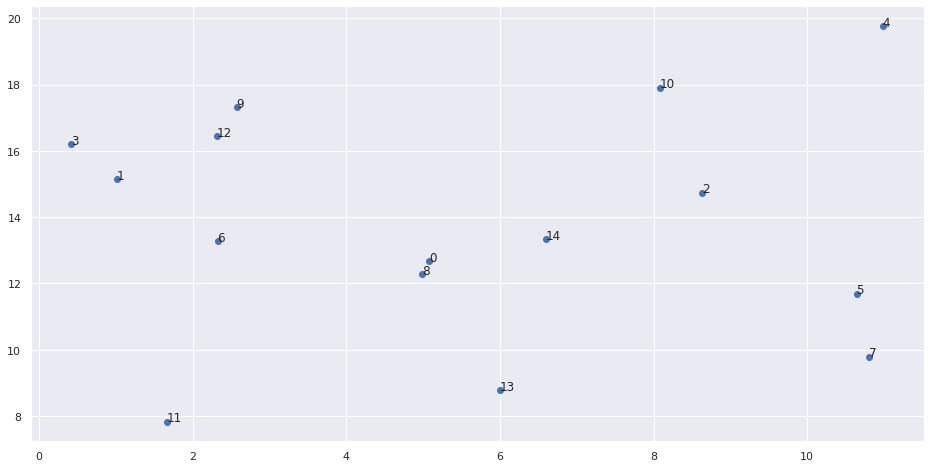

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(CPs['CP1'], CPs['CP2'], 'o')
for i in range(len(CPs['CP1'])):
  plt.text( CPs.iloc[i,0], CPs.iloc[i,1], CPs.index[i])
plt.show()

## **Empleando módulo en python**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = alumnos.copy()
X.head()

,lengua,matematicas,fisica,ingles,filosofia,historia,quimica,efisica
0,5,5,5,5,5,5,5,5
1,7,4,3,8,4,7,3,8
2,5,8,7,6,5,6,7,5
3,7,2,4,8,7,7,3,6
4,8,9,10,8,8,7,9,4


In [ ]:
pca = PCA()
Y = pca.fit_transform(X)
pd.DataFrame(Y)

,0,1,2,3,4,5,6,7
0,-0.397917,1.135386,0.338296,-0.246322,-0.377293,0.202152,-0.027921,0.048325
1,-4.462713,-1.337783,-2.425423,2.079573,-0.430913,0.609411,-0.313362,-0.202133
2,3.160973,-0.930718,-0.063081,0.842002,-0.997203,-0.181827,0.231453,0.396125
3,-5.054451,-2.401576,0.568402,-0.256977,0.629243,0.834902,0.468278,0.354643
4,5.511130,-5.946156,1.709853,0.358517,0.884737,0.040994,0.097032,-0.183248
5,5.167696,2.116624,-0.995471,0.944724,-0.422021,-0.530271,0.514394,-0.127862
6,-3.150999,0.541694,-1.370309,0.082610,0.508402,-0.250520,-0.186320,-0.113192
7,5.326316,4.015485,1.117649,-0.167759,0.872207,1.046670,-0.195362,-0.100423
8,-0.491391,1.534265,4.463358,0.197872,-0.825957,-0.249461,-0.489873,0.040692
9,-2.901626,-3.494719,0.589926,-0.975953,-0.472491,-0.148428,0.632034,-0.312757


In [ ]:
print(pca.explained_variance_ratio_)

[0.44158748 0.37988895 0.1211854  0.02558895 0.01705972 0.00926317
 0.00410837 0.00131796]


In [ ]:
print(pca.singular_values_)

[13.87347332 12.86782539  7.26778336  3.33966649  2.72685984  2.00935513
  1.33817055  0.75792752]
